In [1]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
import behav_viz.utils as utils
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

from config_alpha_experiment import *

# settings
%load_ext autoreload
%autoreload 2

[2024-09-28 09:50:00,788][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-09-28 09:50:02,738][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
ACTIVE_ALPHA_ANIMALS = ["R044", "R048", "R052", "R053", "R056"]
MIN_DATE, _ = utils.dj_utils.return_date_window(n_days_back=20)
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ACTIVE_ALPHA_ANIMALS, date_min=MIN_DATE
)

animal_id R044
Fetched 11 dates from Sessions table from 2024-09-08 to 2024-09-21 for R044

animal_id R047
Fetched 18 dates from Sessions table from 2024-09-08 to 2024-09-27 for R047

animal_id R048
Fetched 18 dates from Sessions table from 2024-09-08 to 2024-09-27 for R048

animal_id R050
Fetched 18 dates from Sessions table from 2024-09-08 to 2024-09-27 for R050

animal_id R052
Fetched 18 dates from Sessions table from 2024-09-08 to 2024-09-27 for R052

animal_id R053
Fetched 11 dates from Sessions table from 2024-09-08 to 2024-09-21 for R053

animal_id R054
Fetched 18 dates from Sessions table from 2024-09-08 to 2024-09-27 for R054

animal_id R056
Fetched 18 dates from Sessions table from 2024-09-08 to 2024-09-27 for R056



In [3]:
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ACTIVE_ALPHA_ANIMALS, date_min=MIN_DATE, verbose=True
)

Fetched data from SessionAggDate table from 2024-09-08 to 2024-09-27  
	Last date on the database is 2024-09-27 but user is querying data 
	for 2024-09-28. Attempting to manually aggregate today's data.
No new data from today, 2024-09-28 to add to SessionAggDate.

131 daily summaries fetched for animals: 
['R044', 'R047', 'R048', 'R050', 'R052', 'R053', 'R054', 'R056']
between 2024-09-08 and 2024-09-27


## Plot over Days


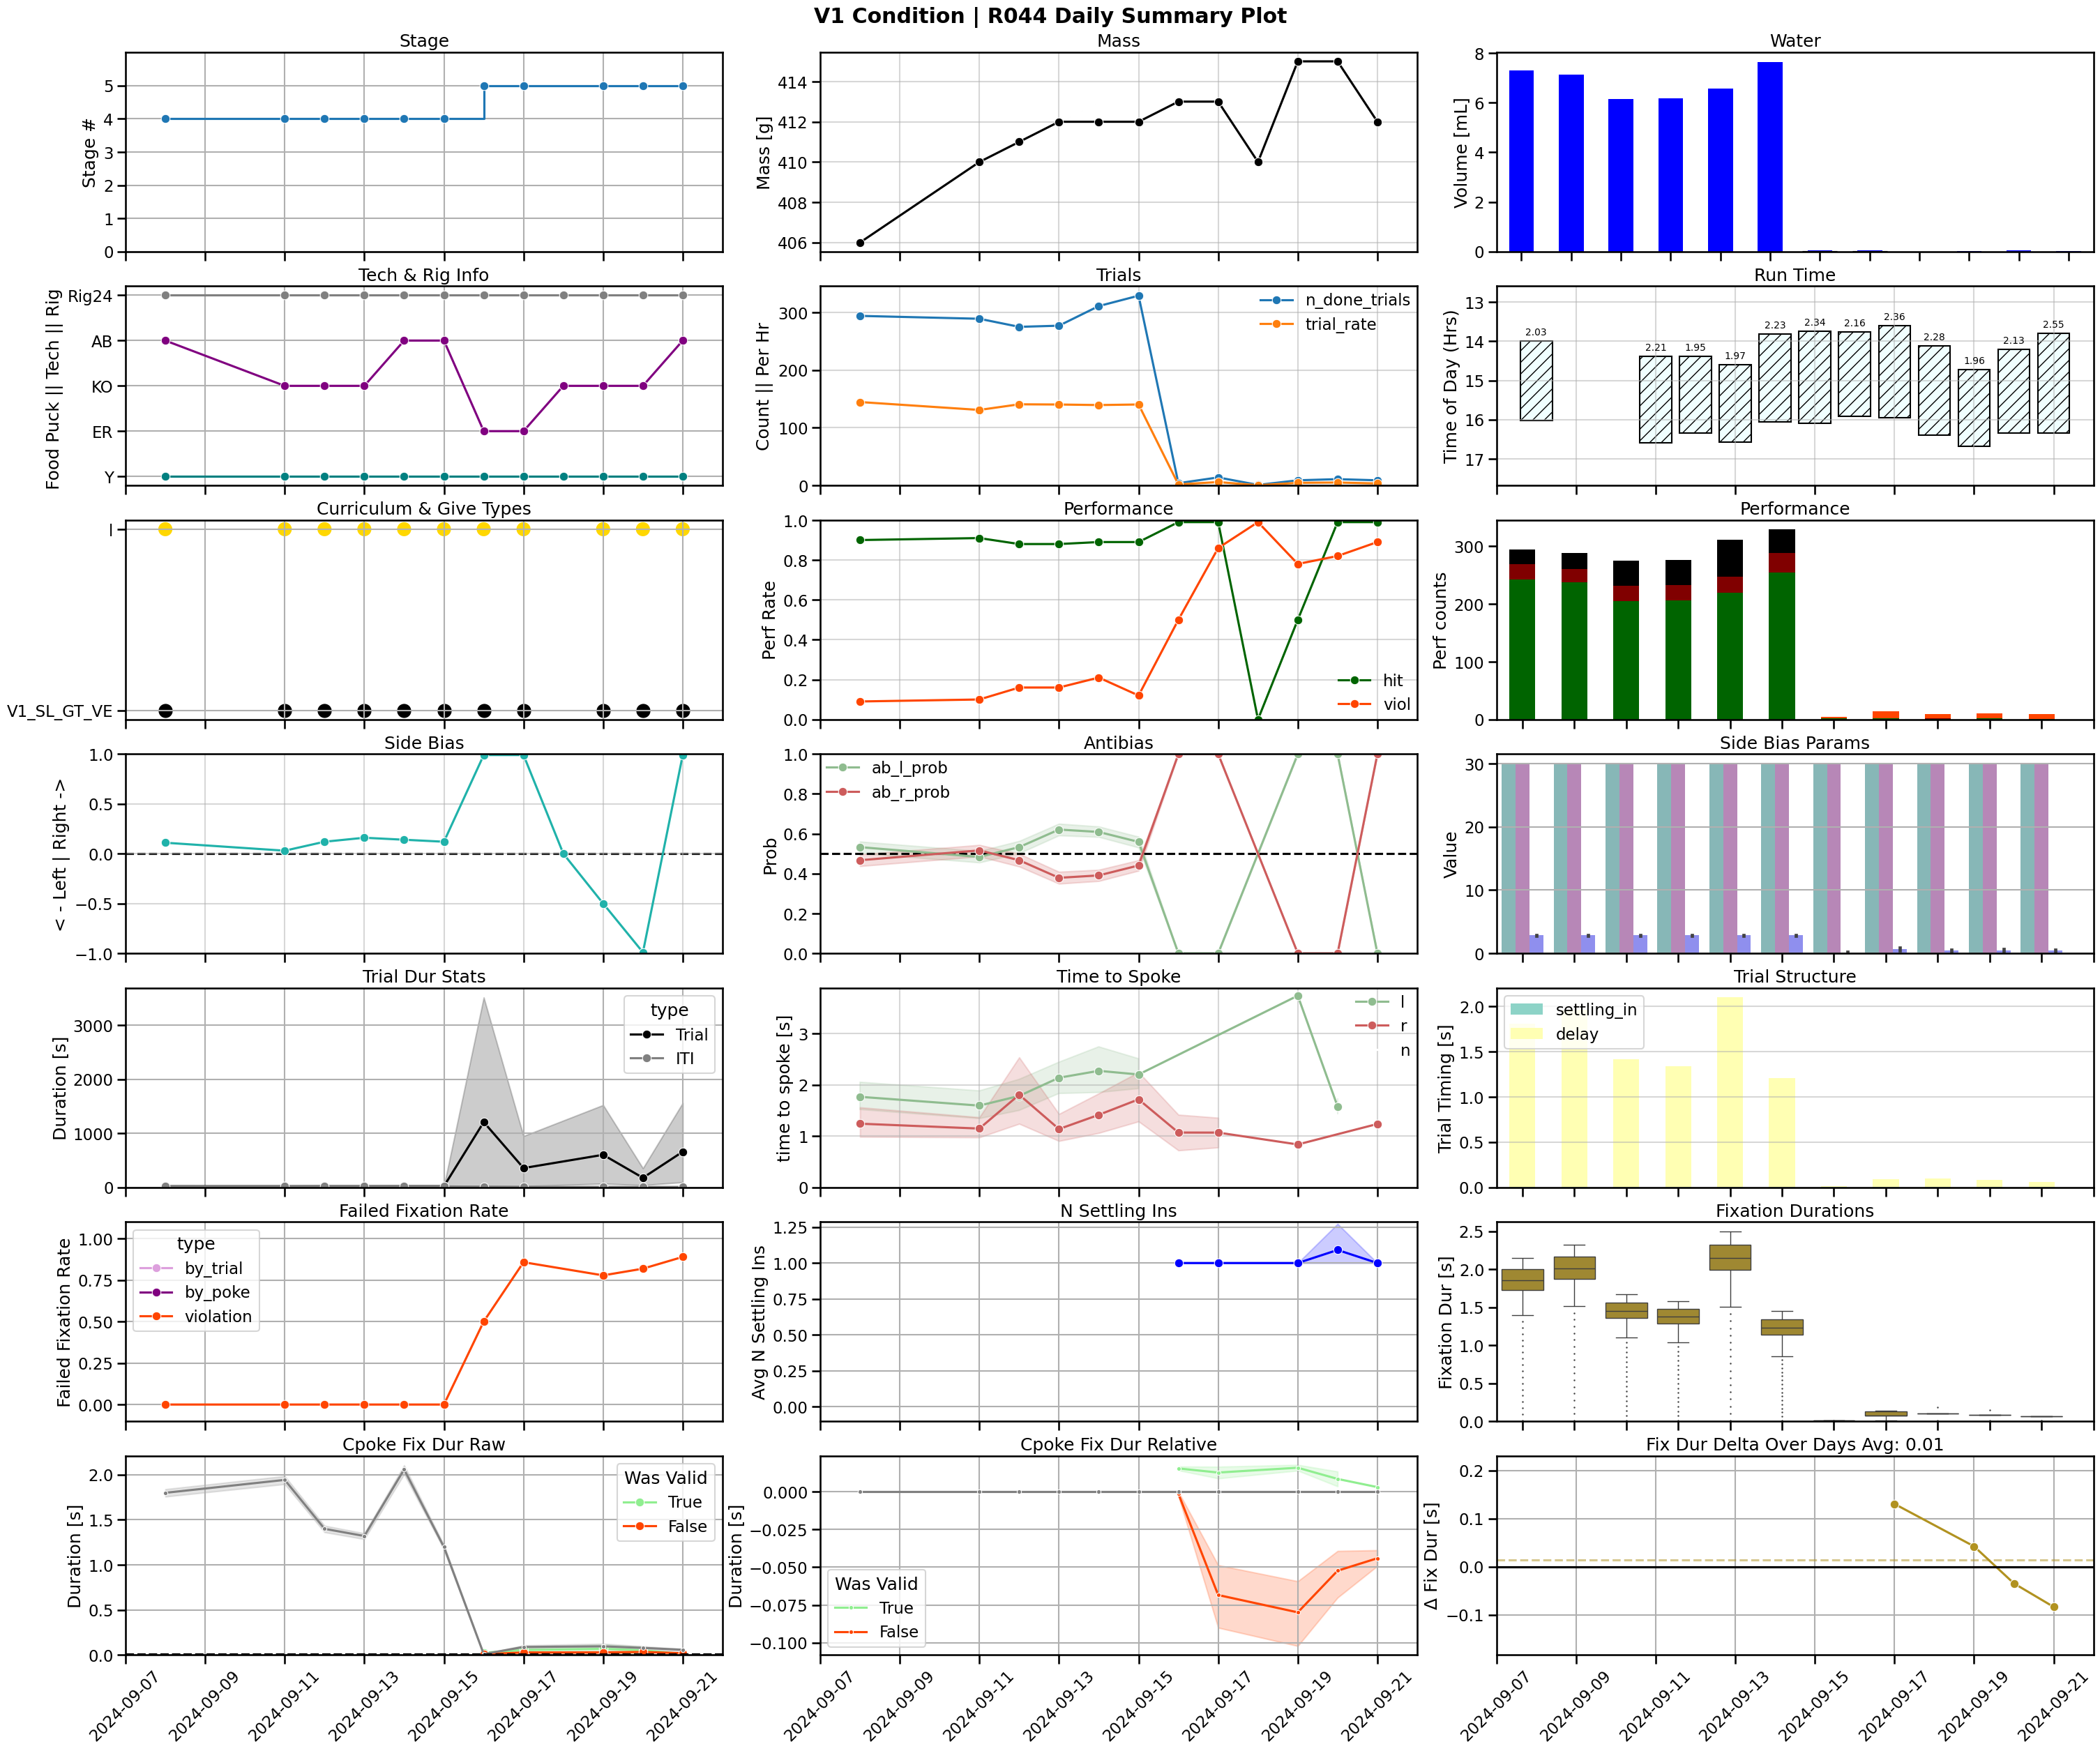

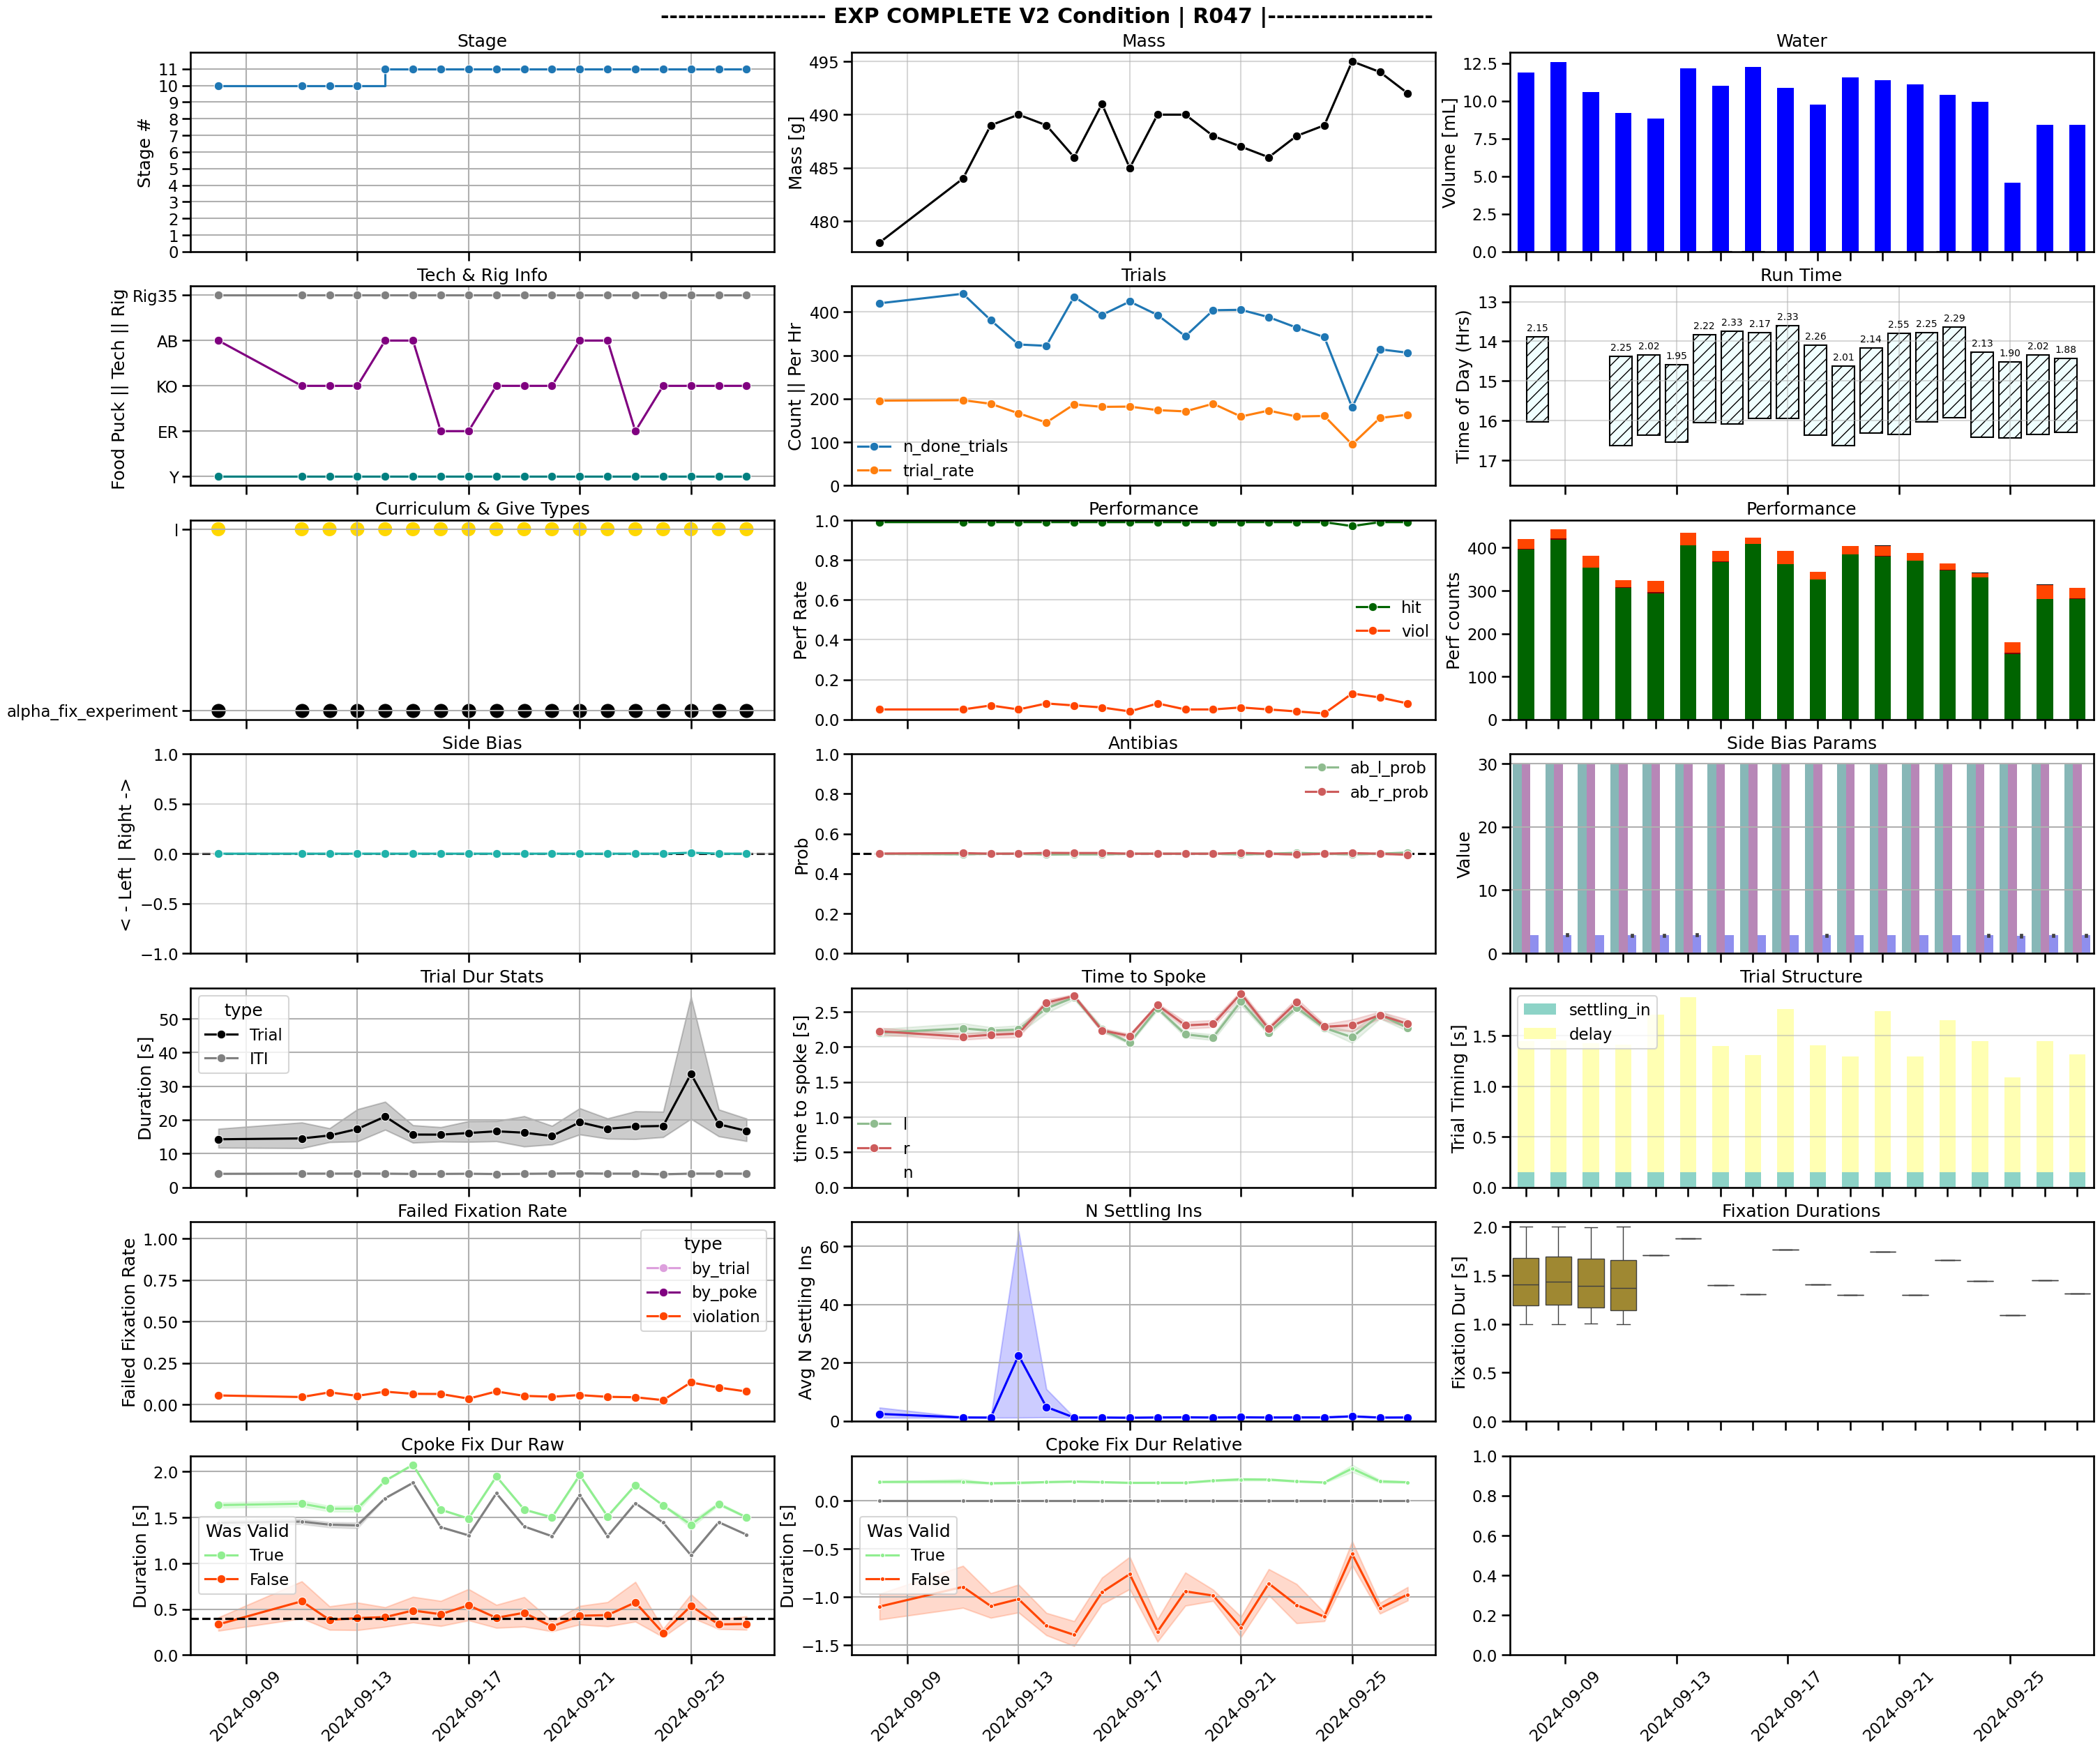

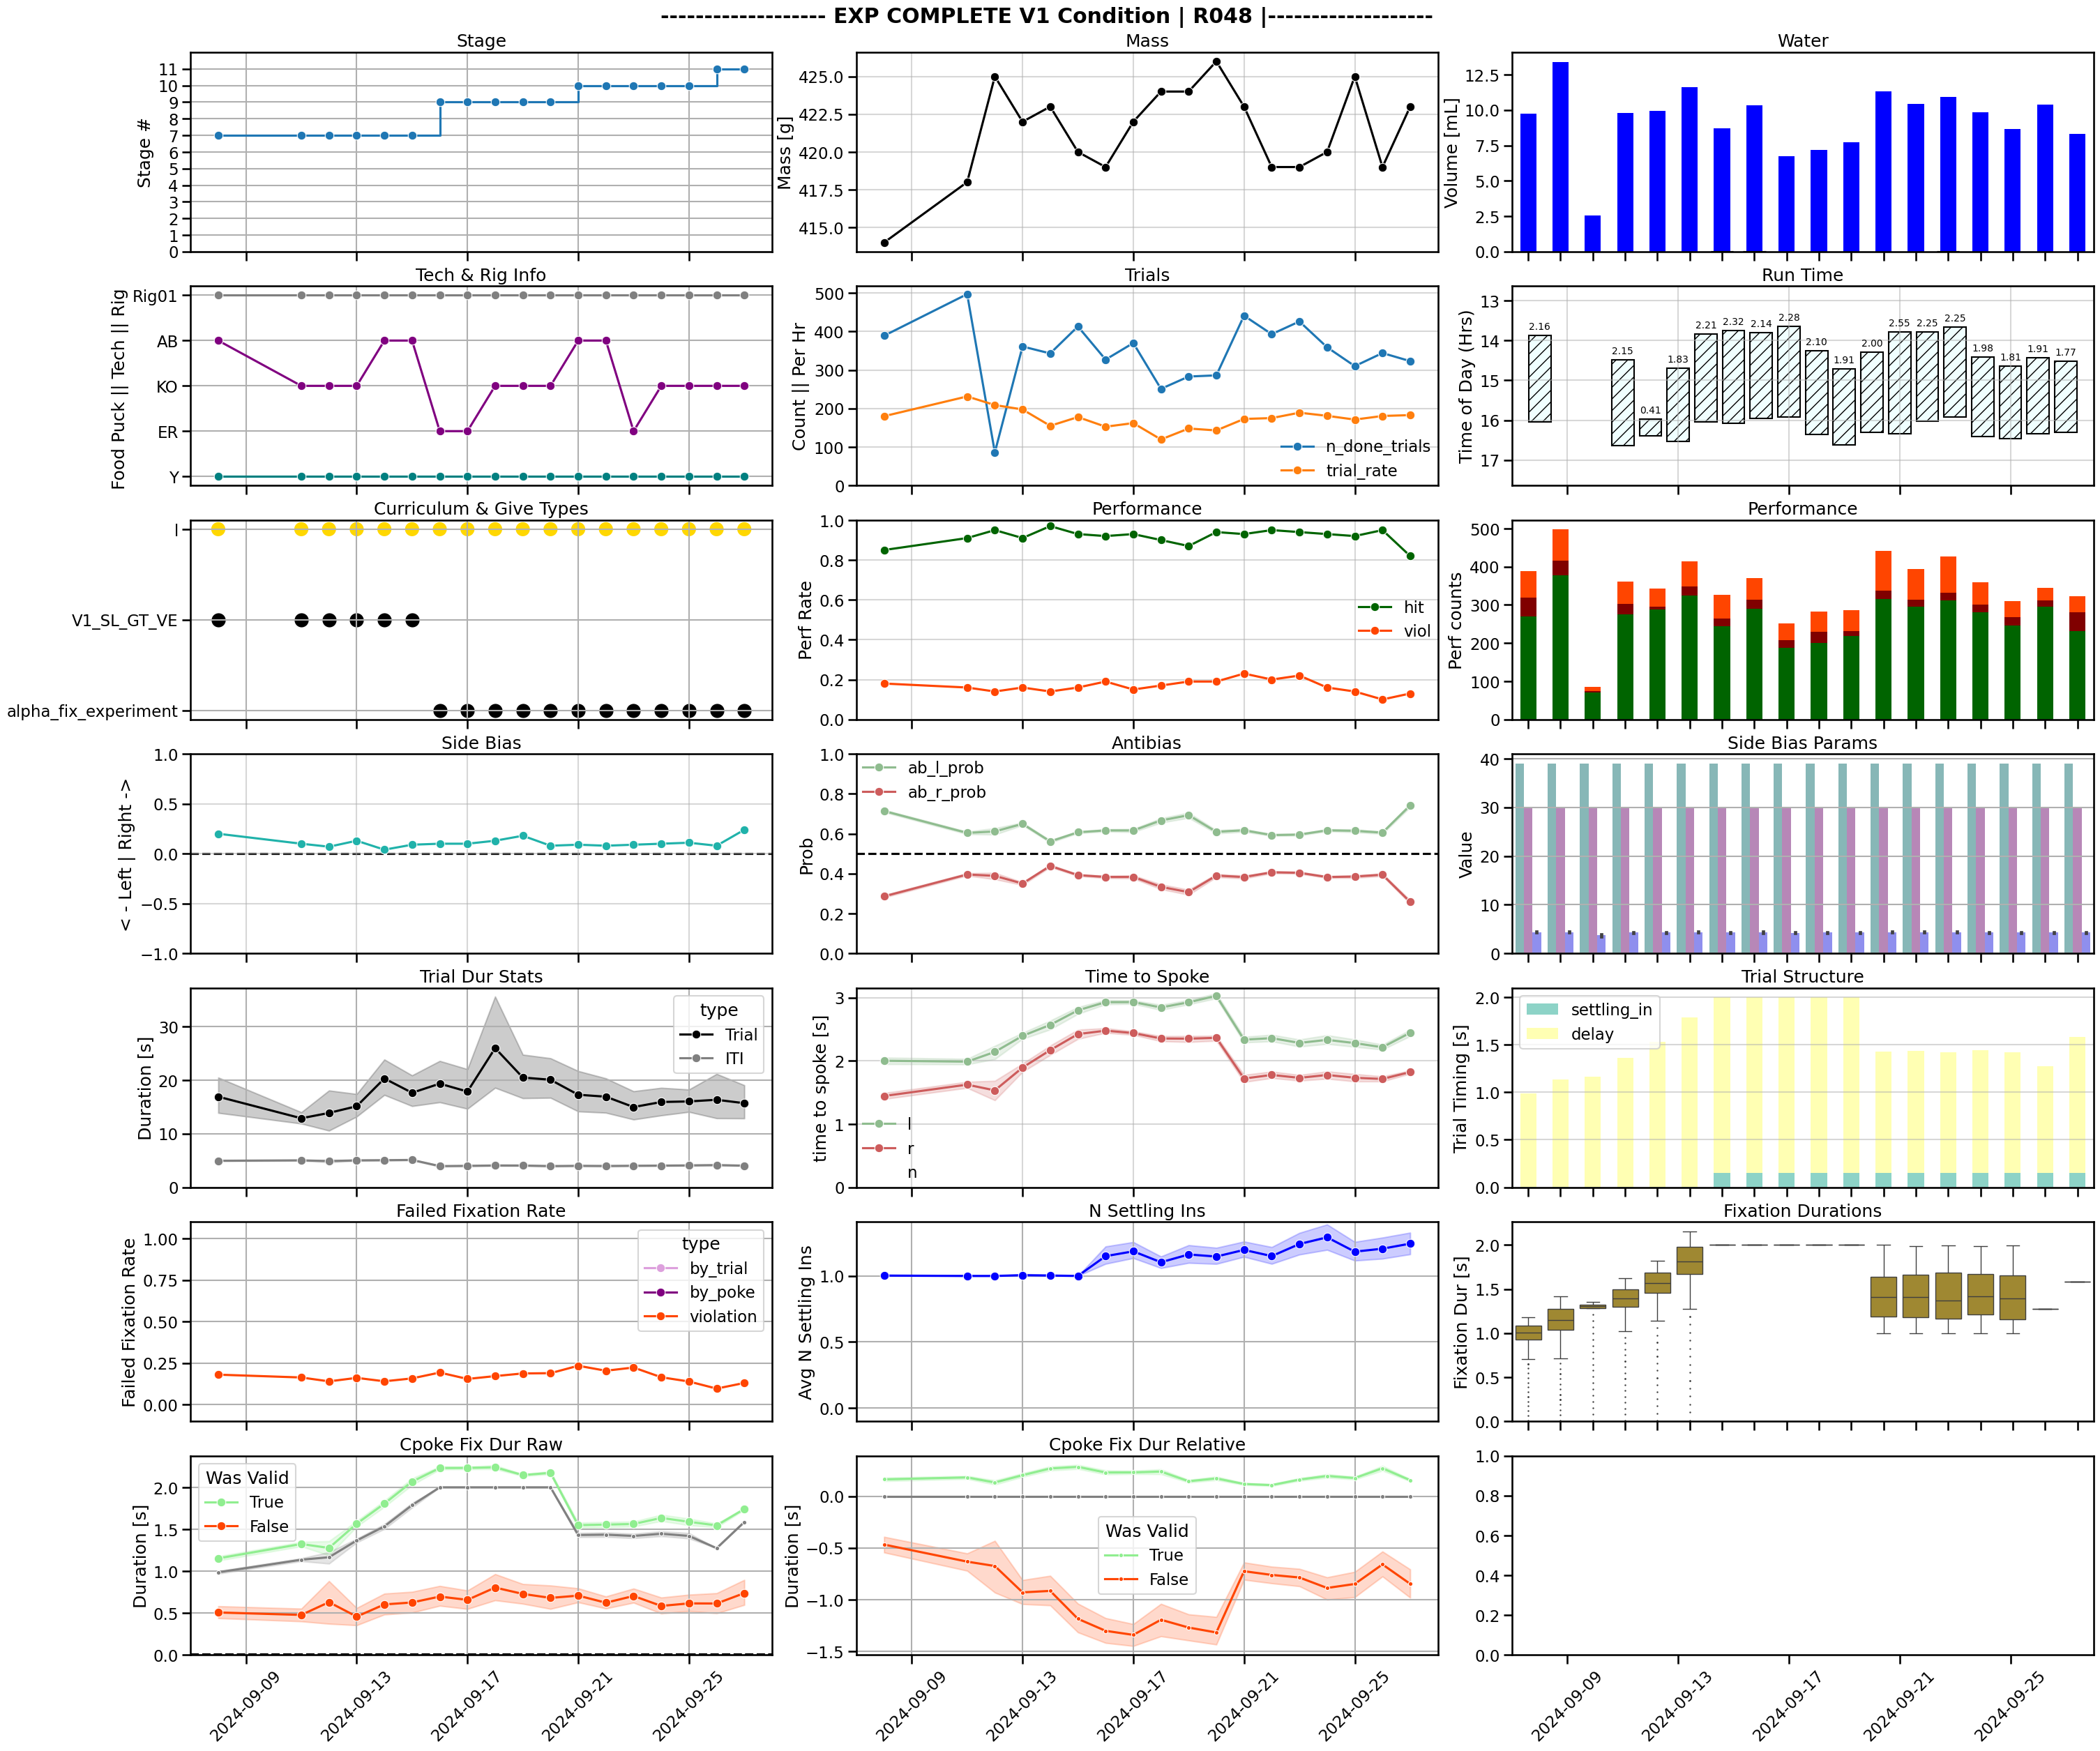

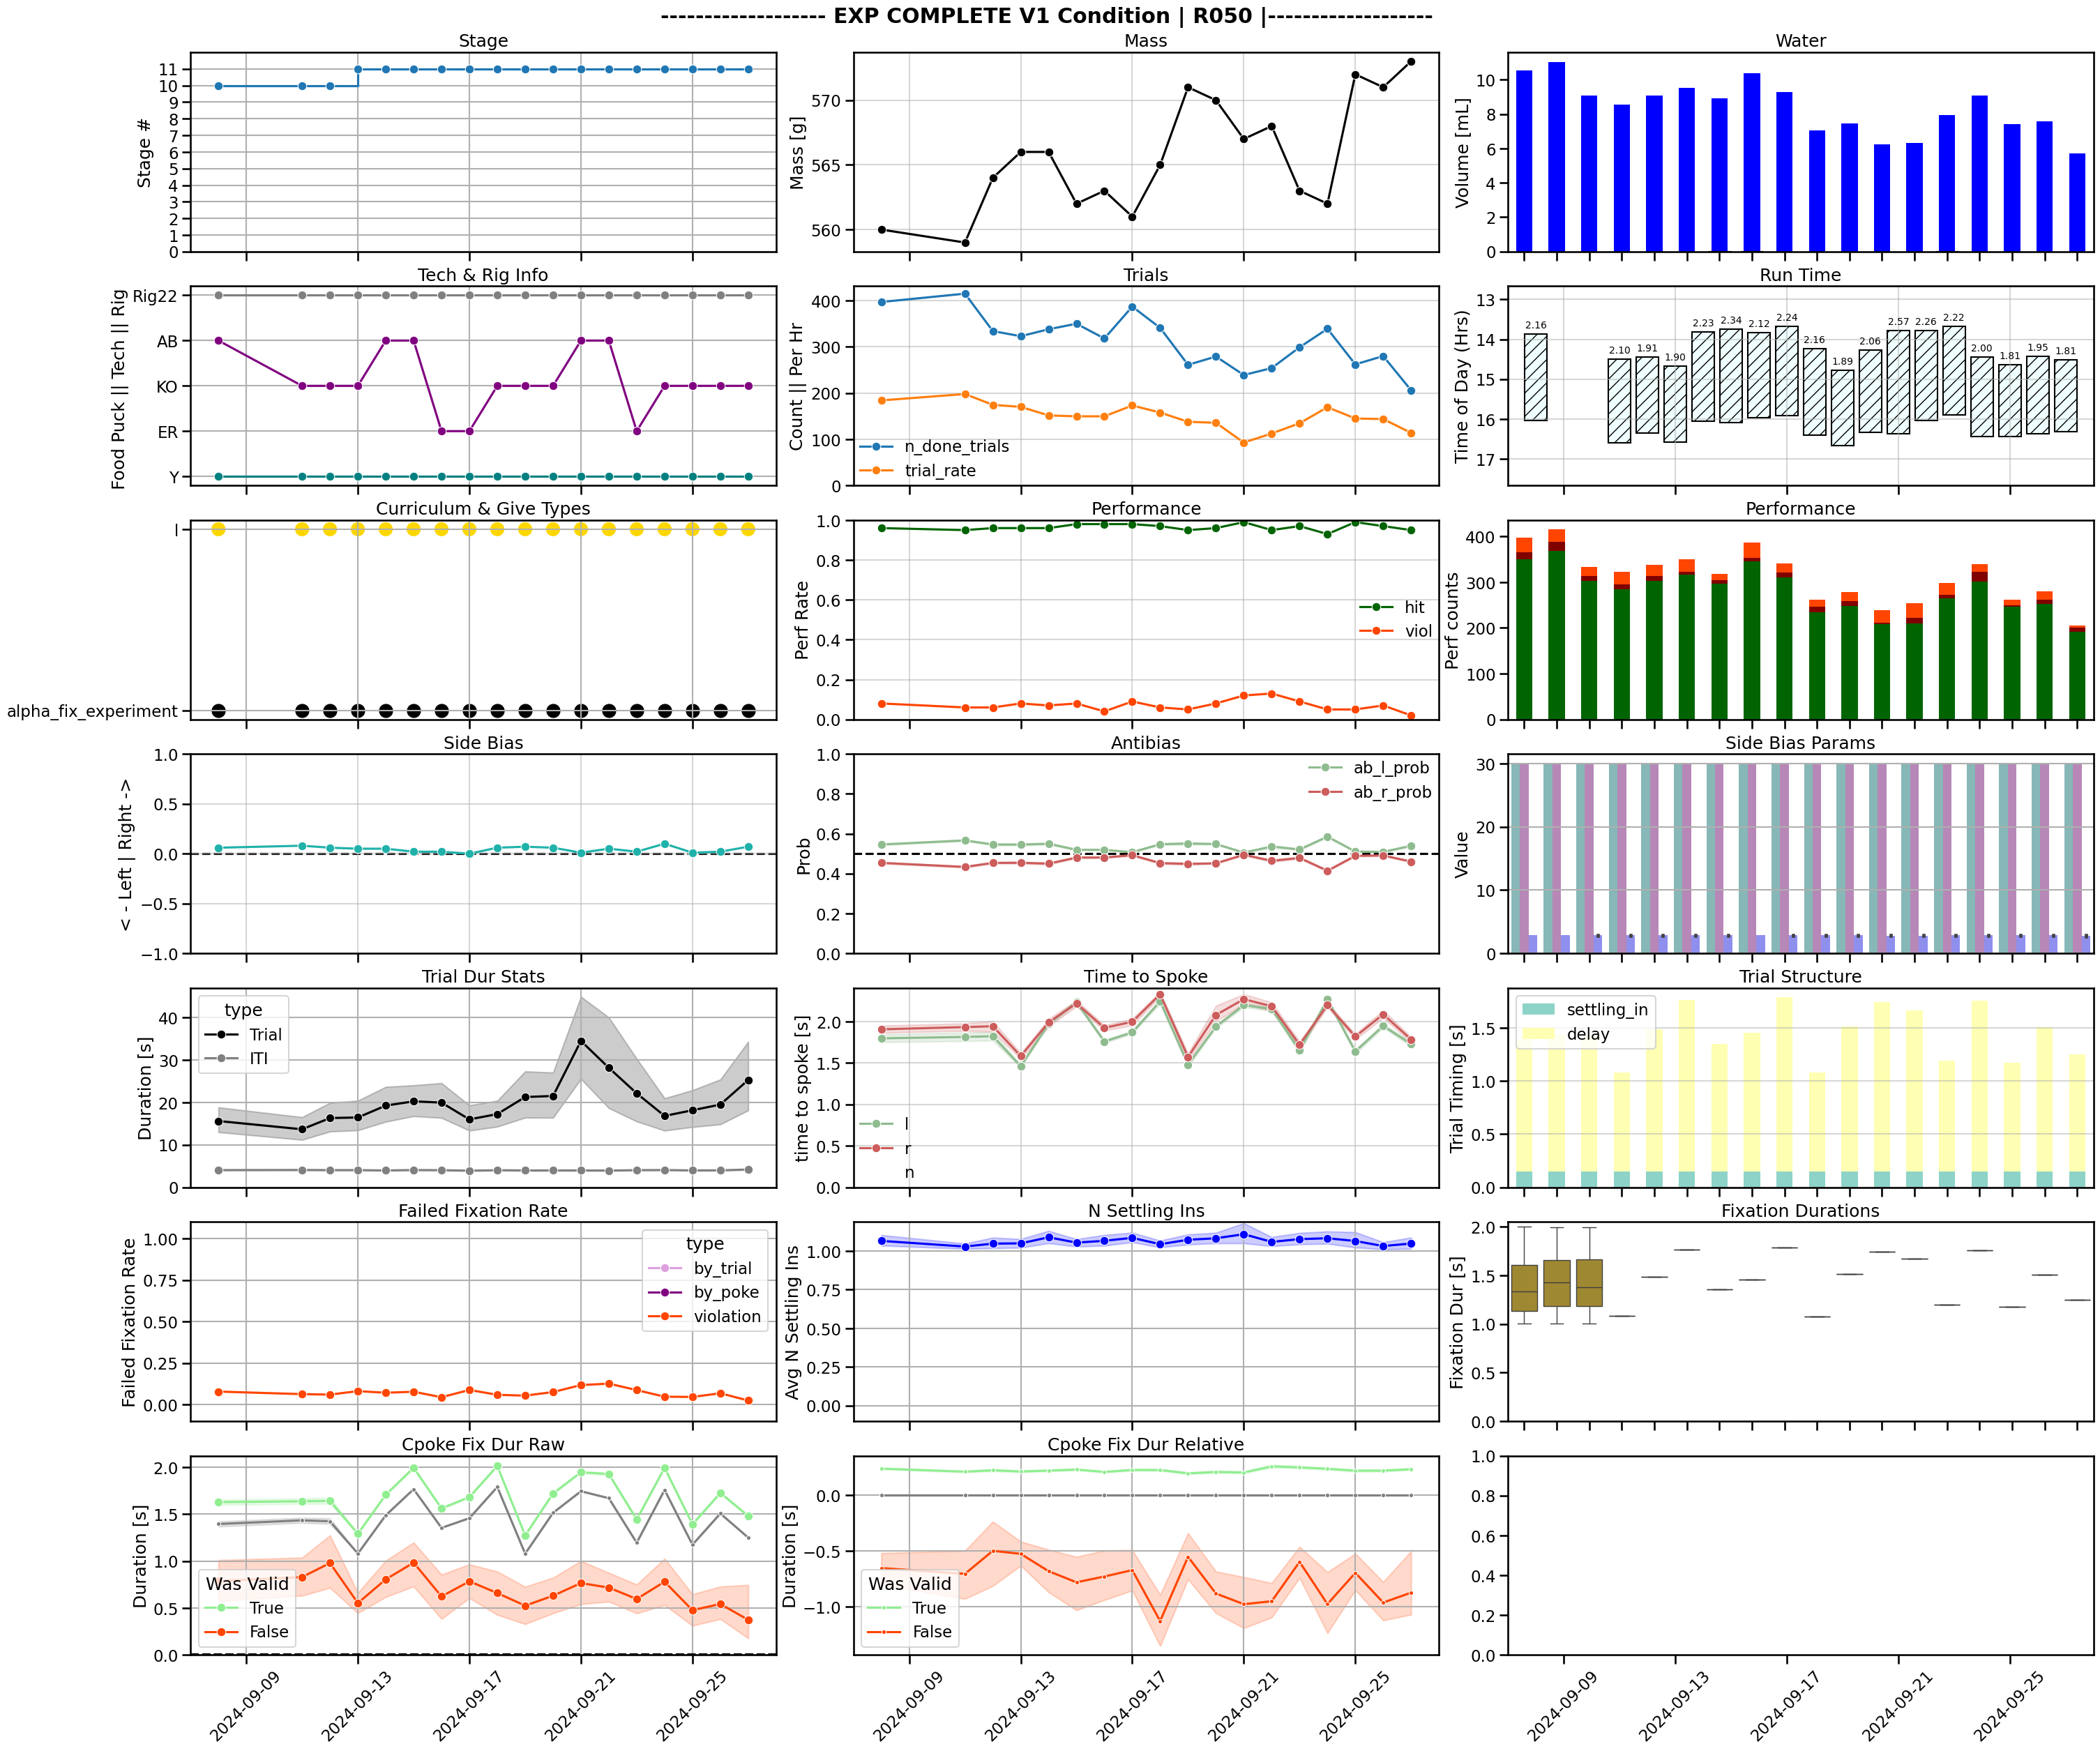

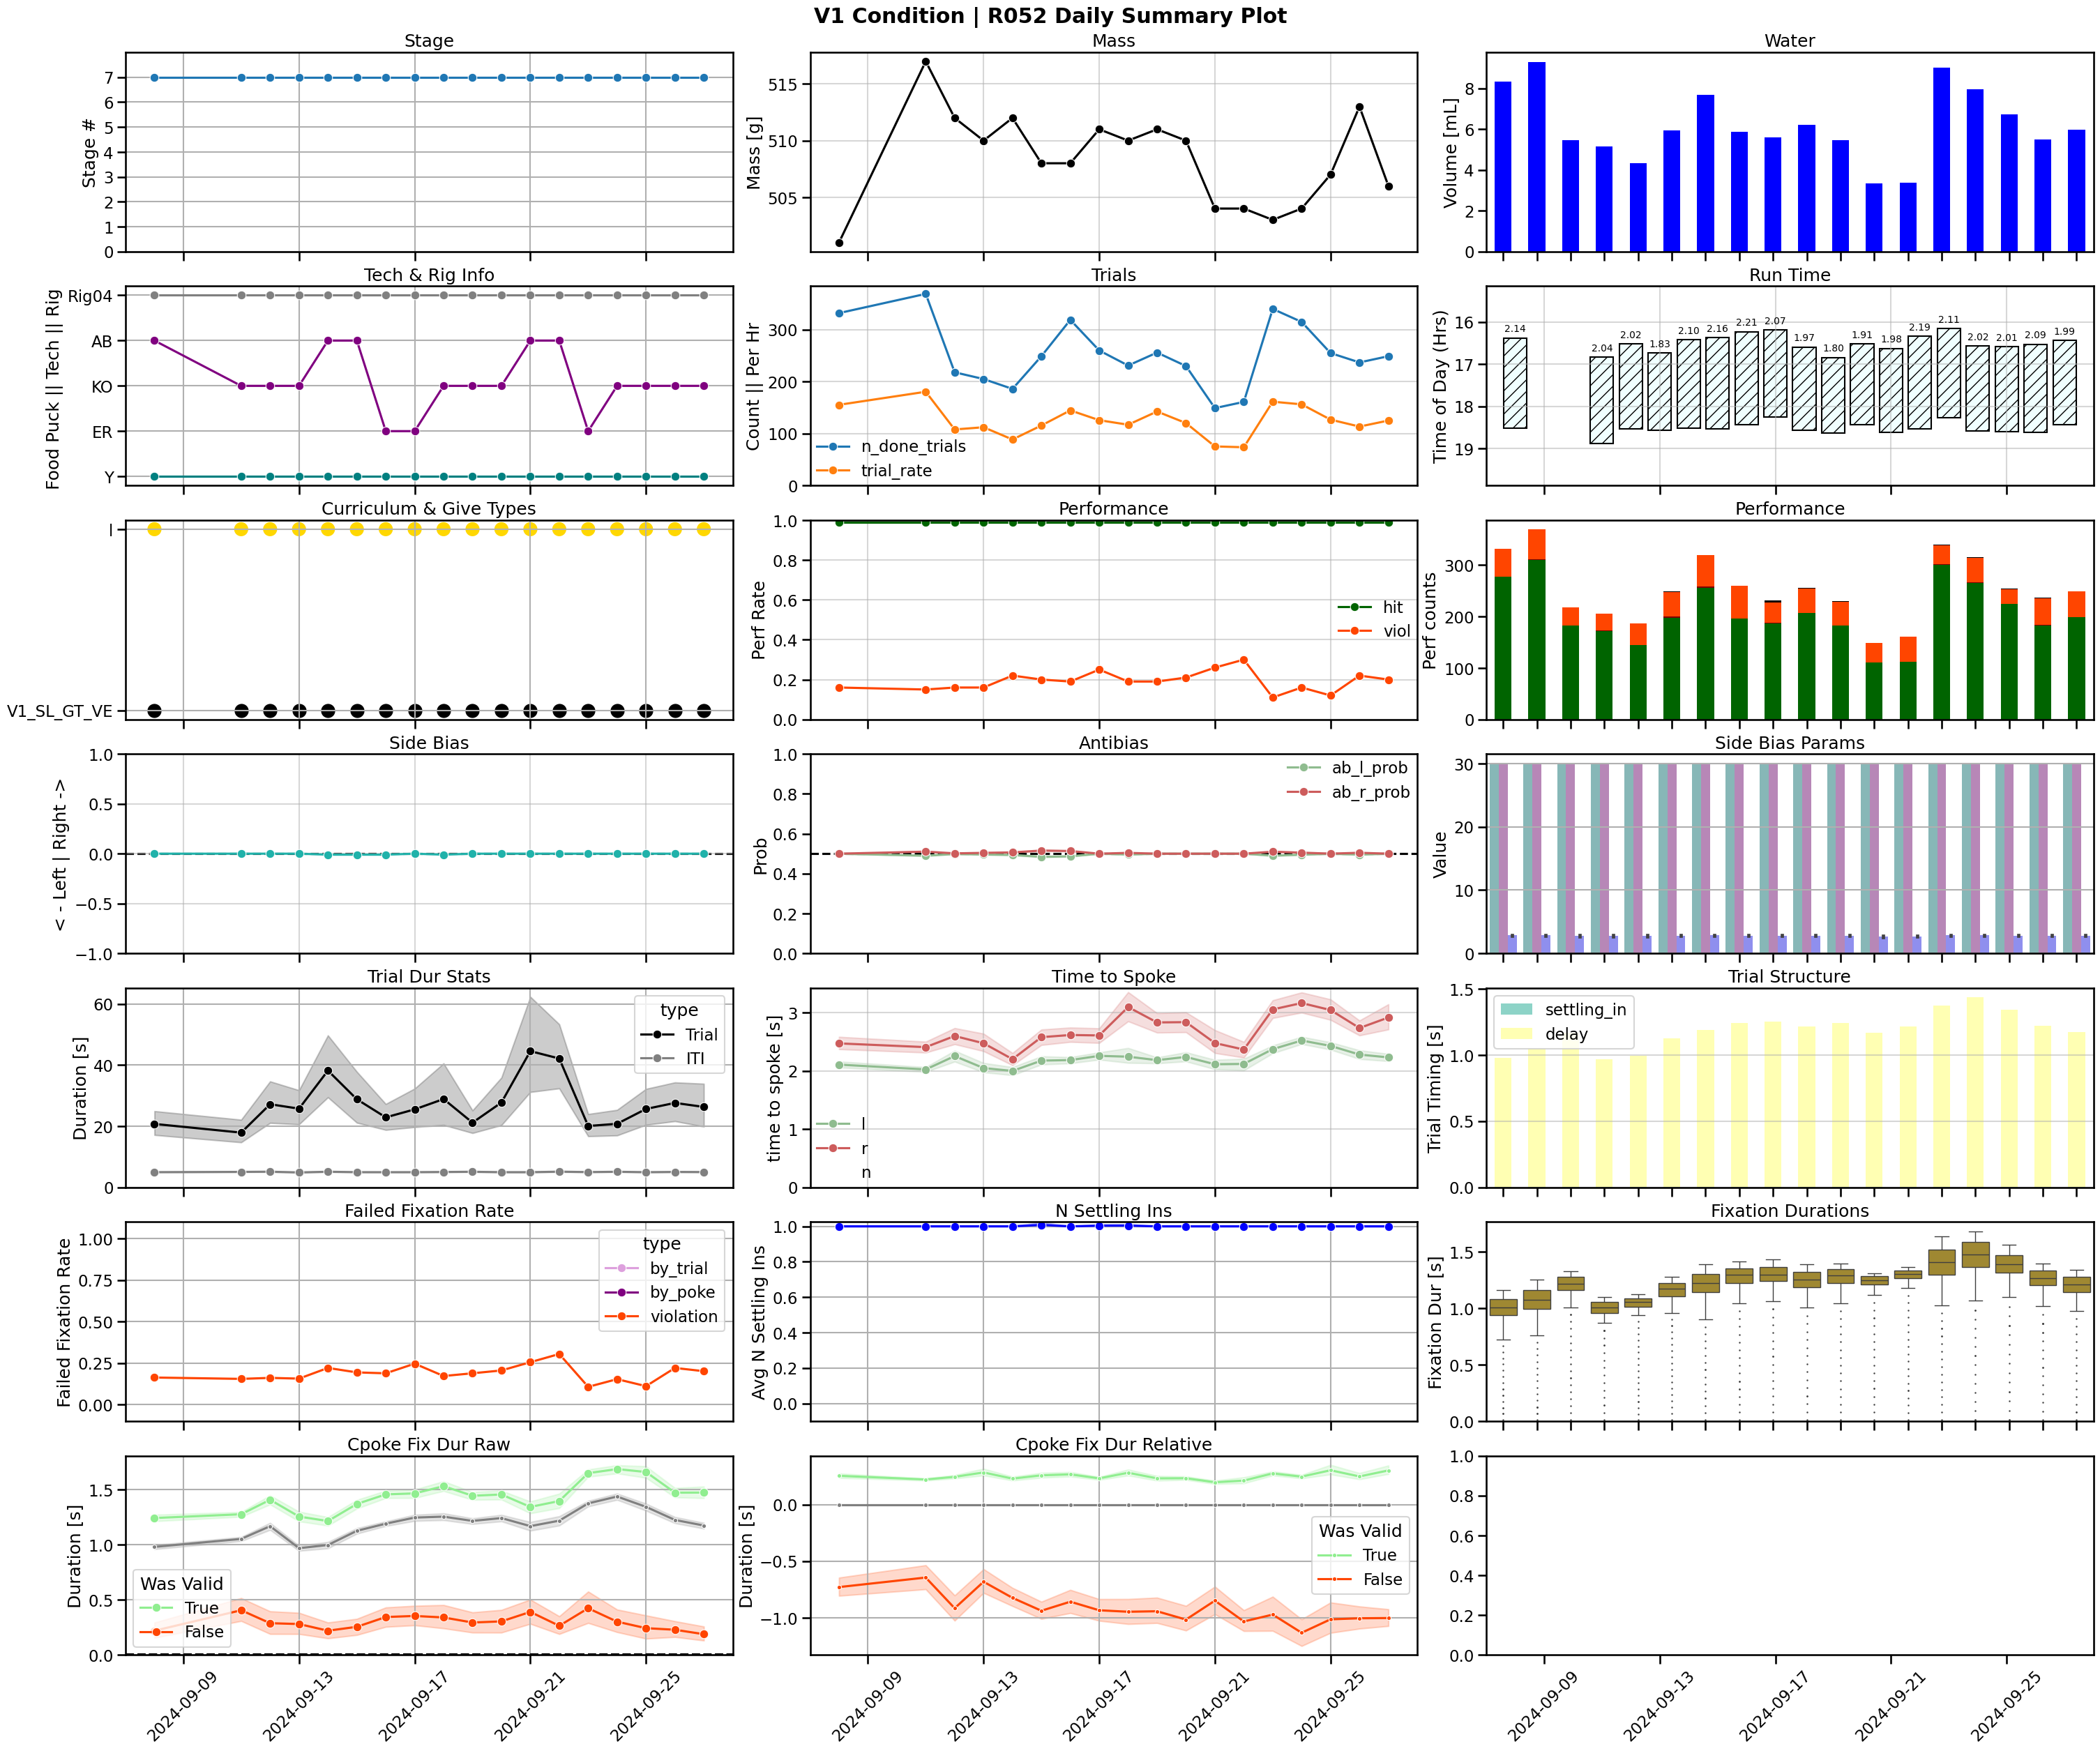

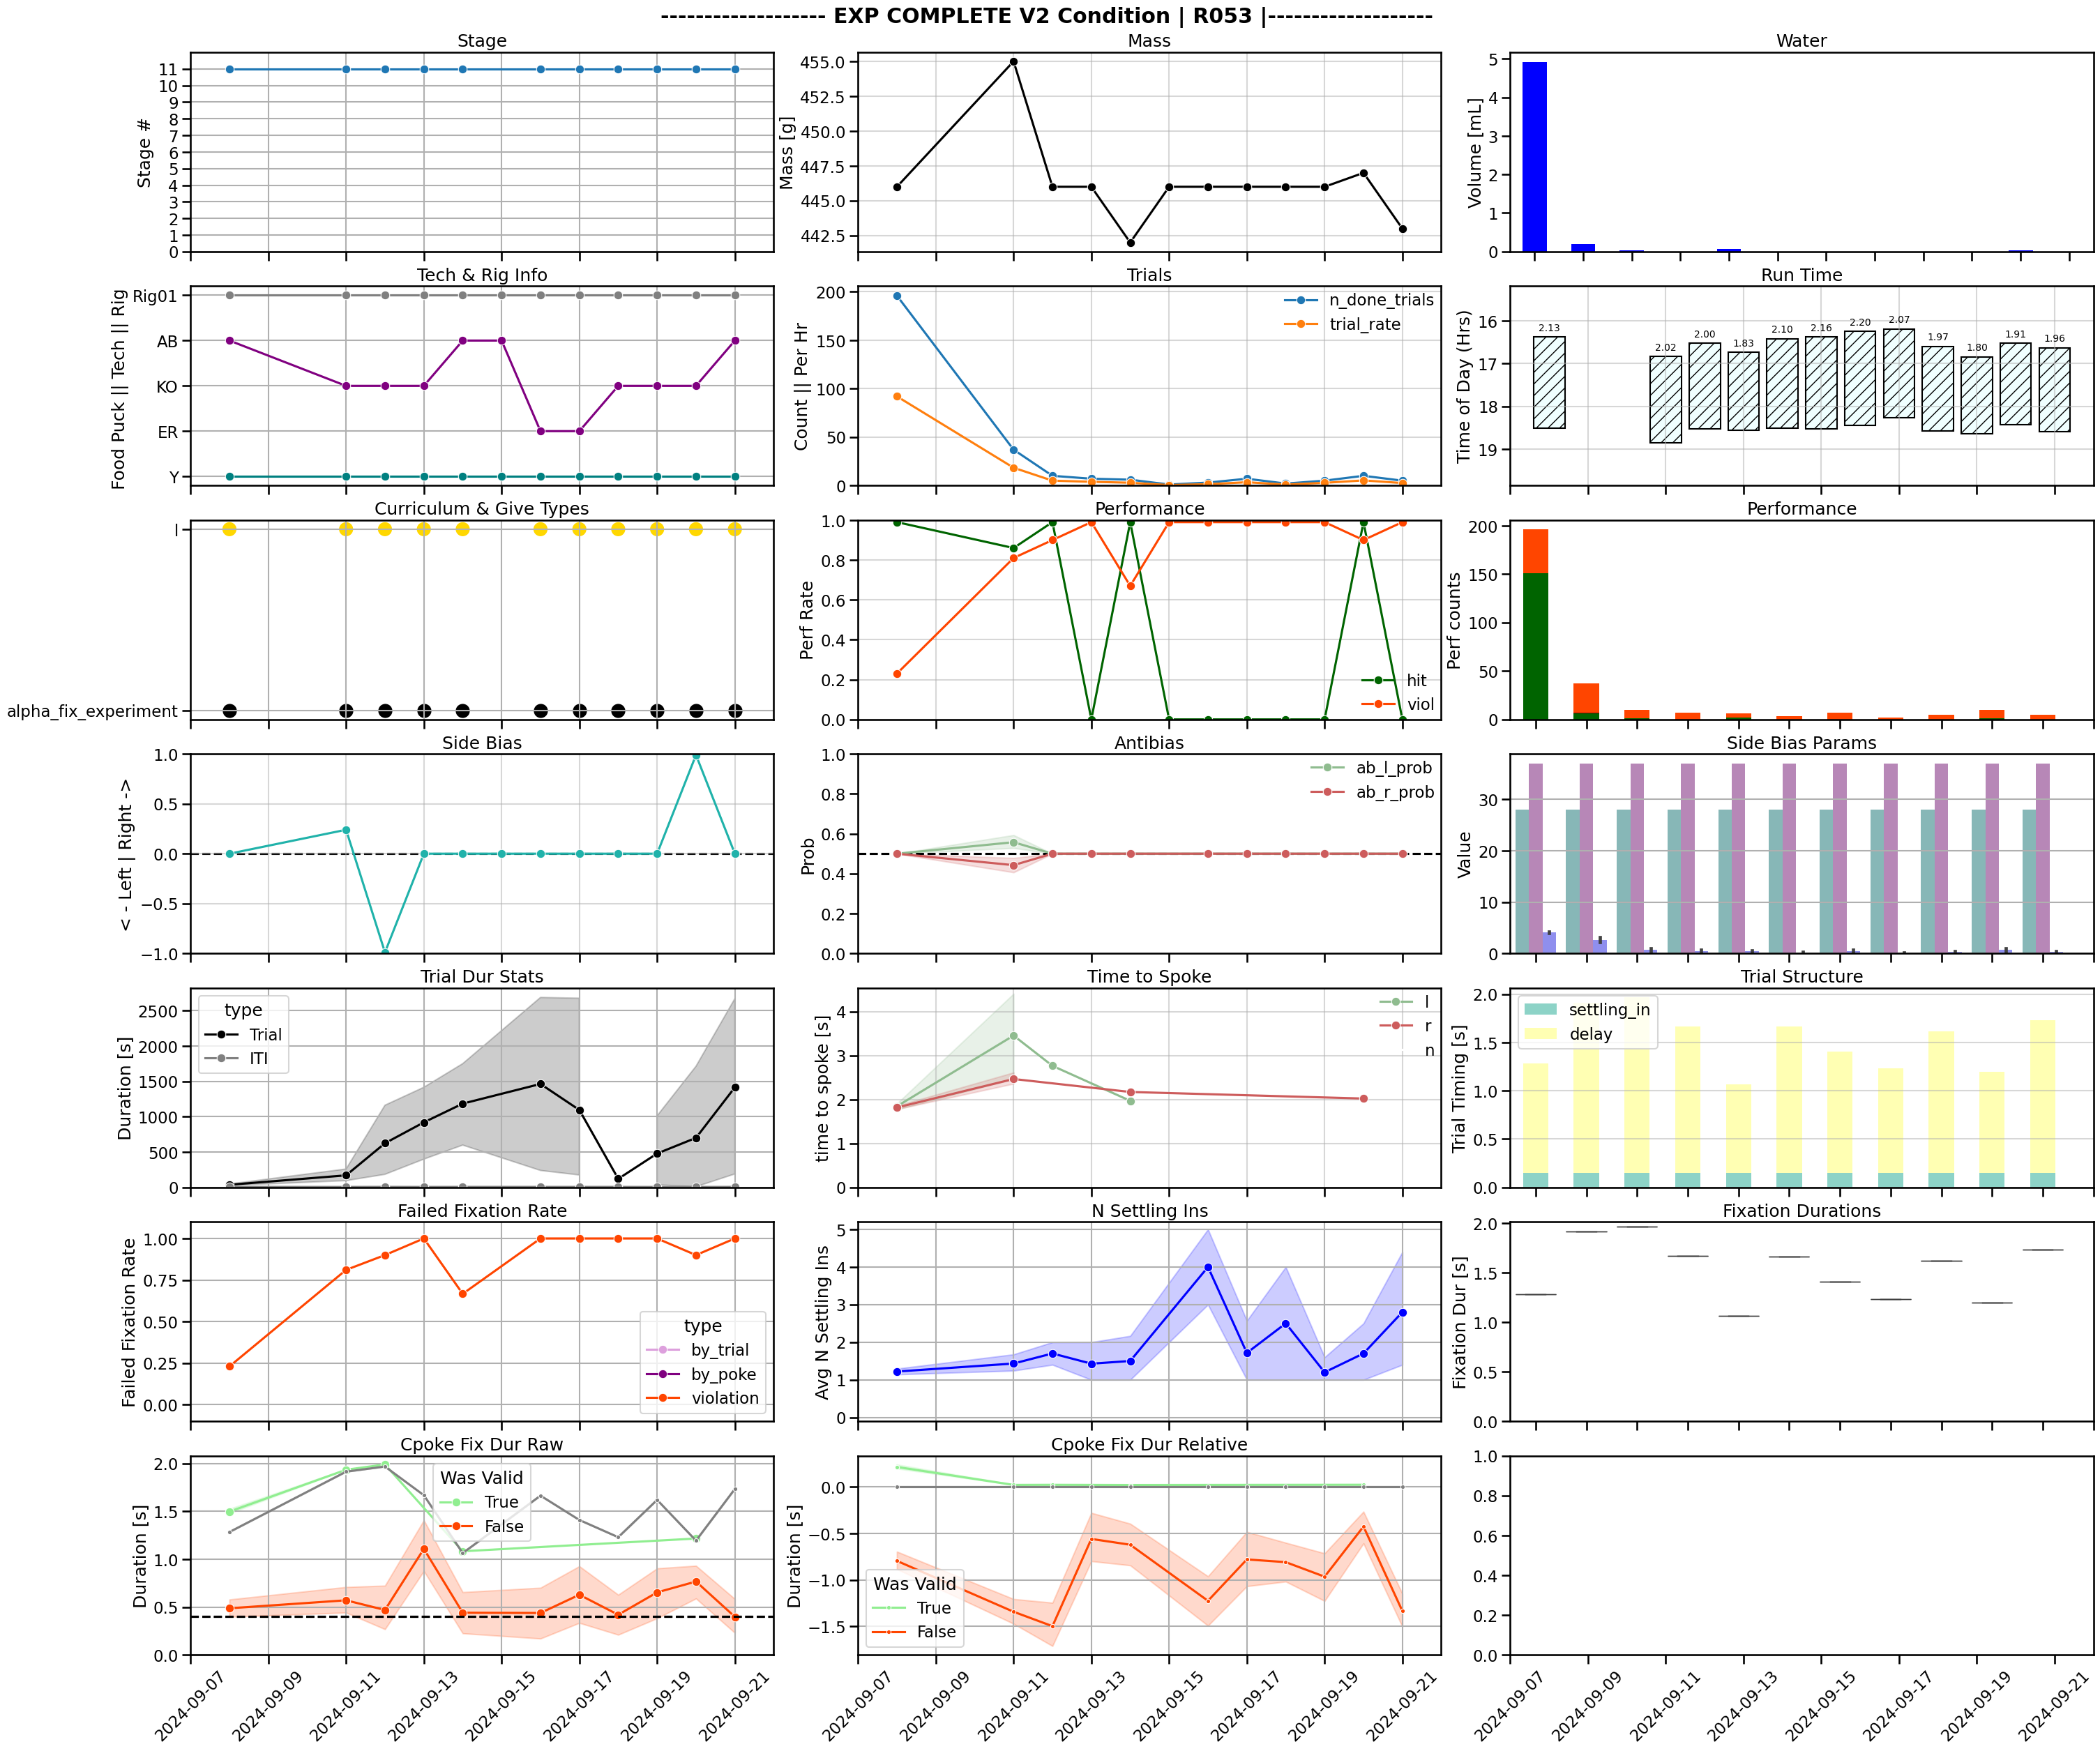

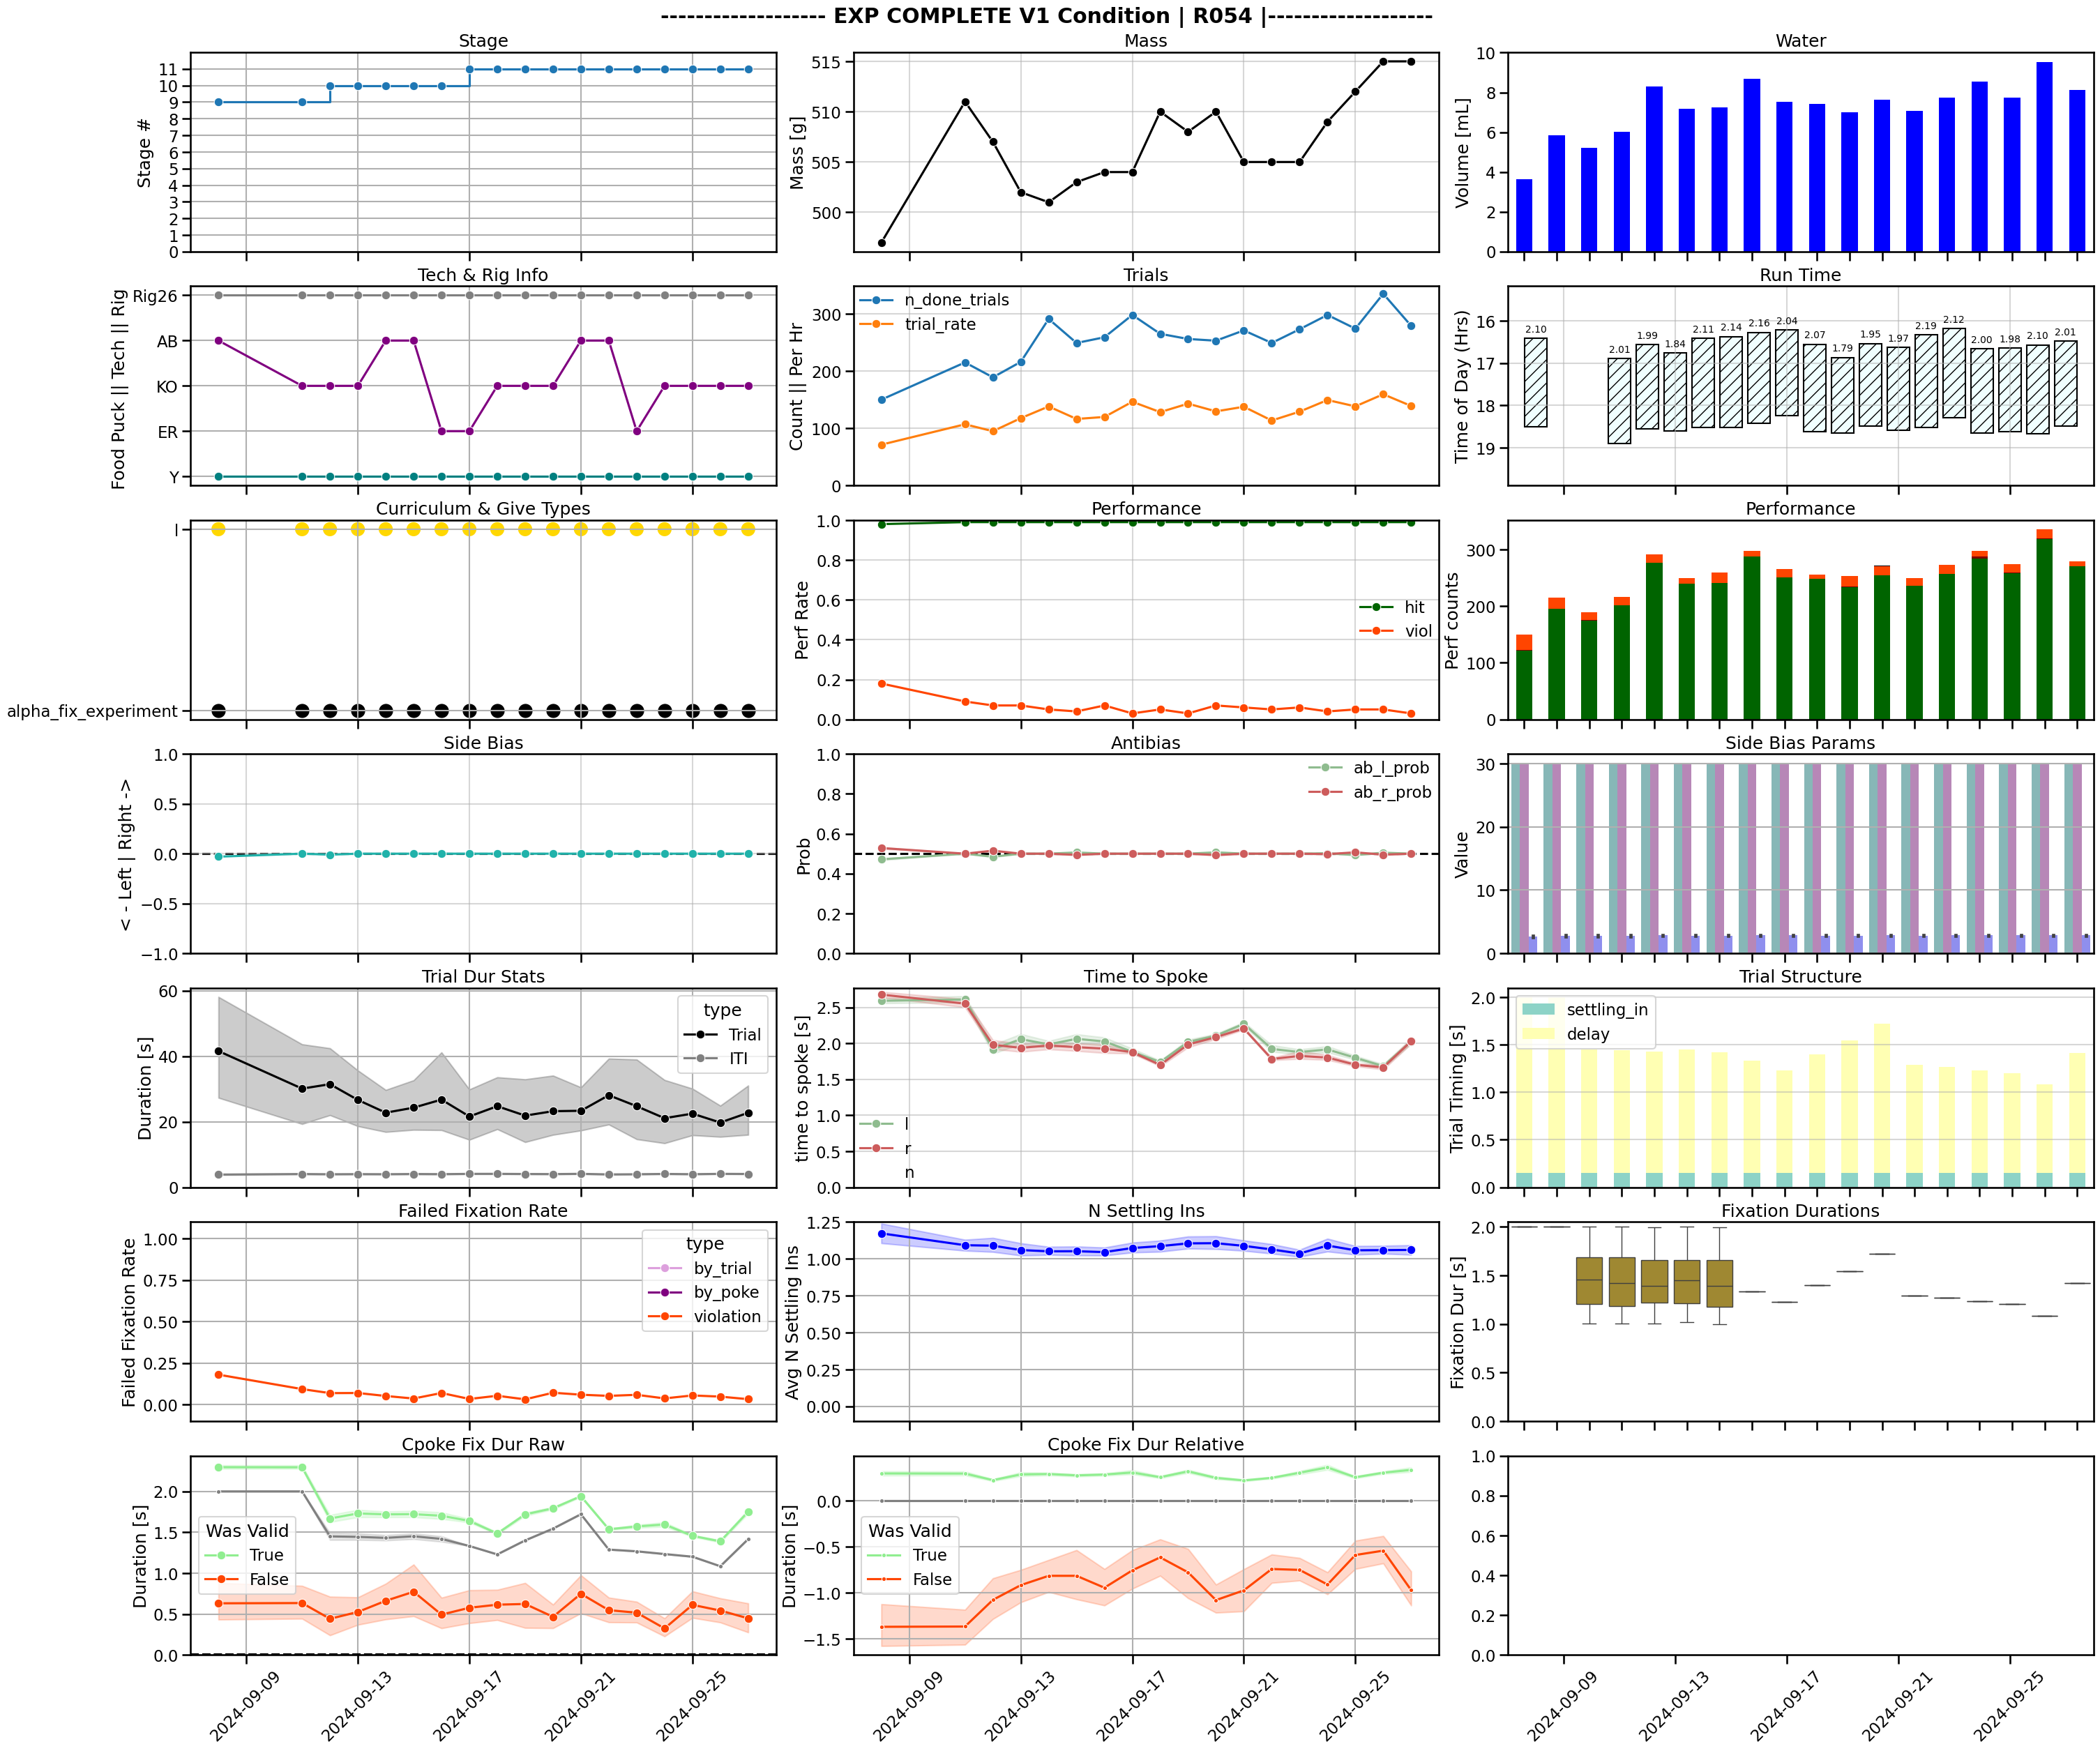

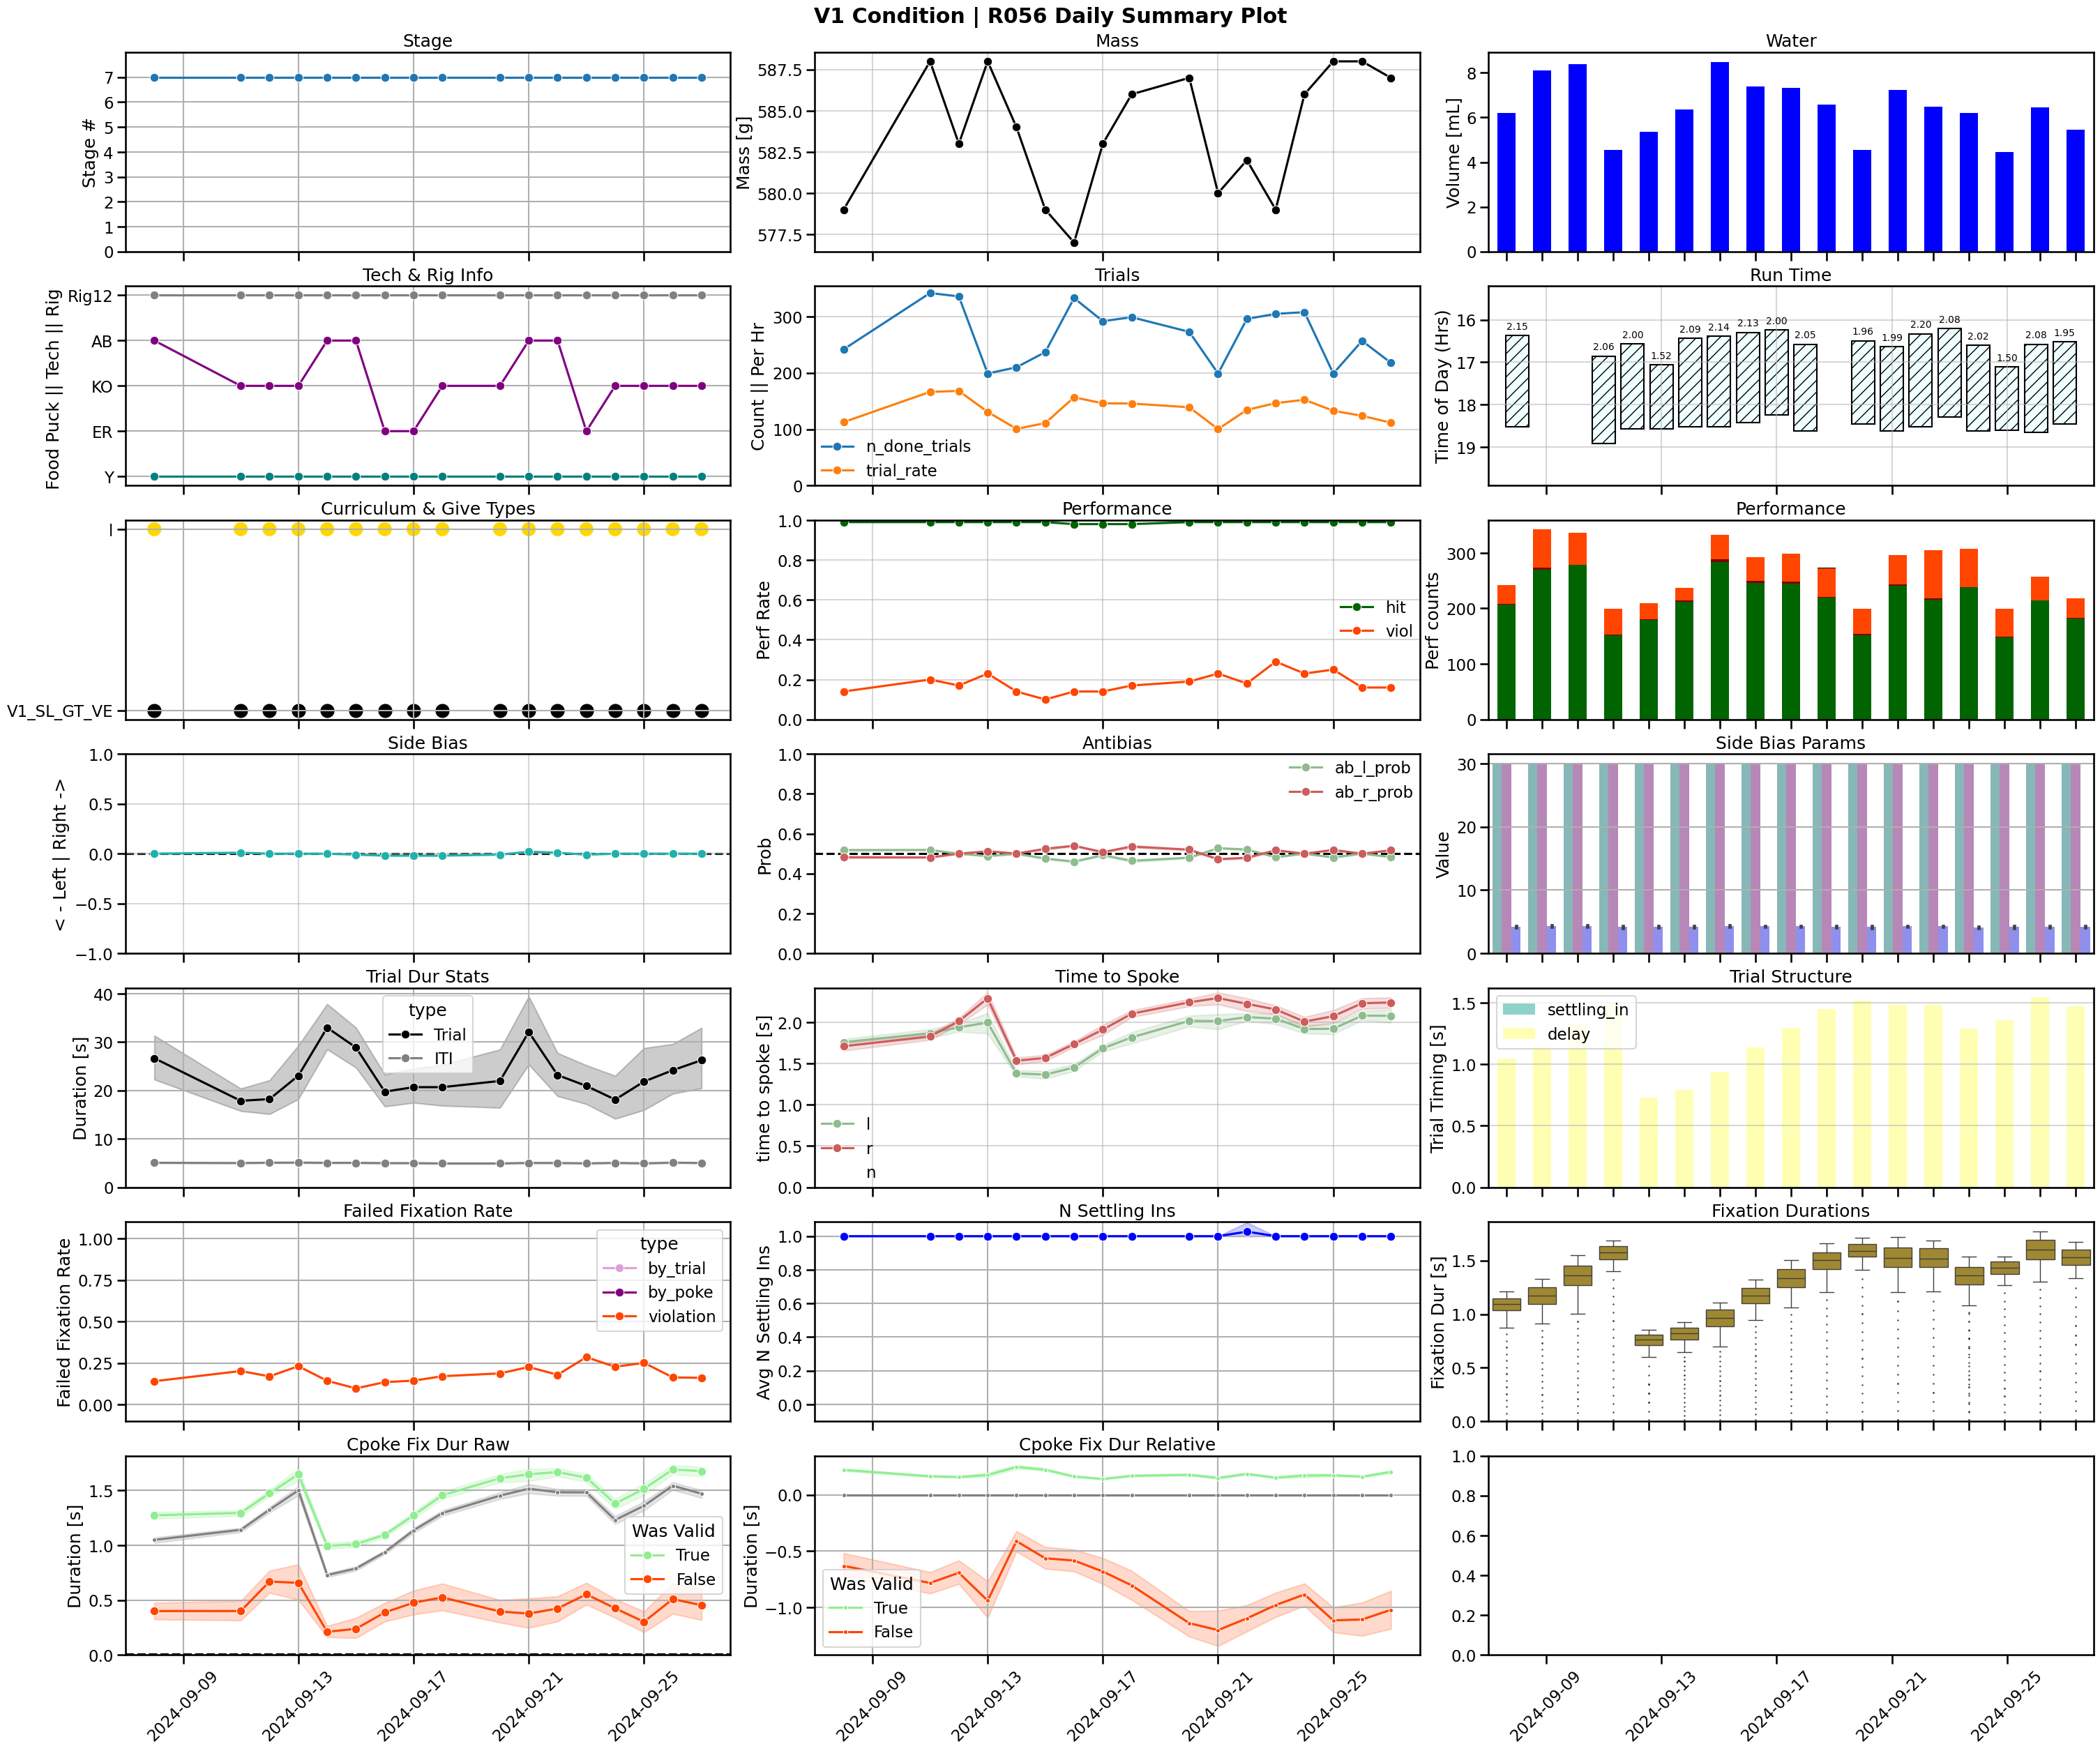

In [4]:
# ALPHA_2_SESSION_6 = set(ALPHA_2_ANIMALS) & set(ALPHA_SESSION_6)
for animal_id, animal_days_df in days_df.query(
    "animal_id in @ACTIVE_ALPHA_ANIMALS"
).groupby("animal_id"):

    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [5]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ACTIVE_ALPHA_ANIMALS"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R047_2024-09-22_day_summary
making R048_2024-09-22_day_summary
making R050_2024-09-22_day_summary
making R052_2024-09-22_day_summary
making R054_2024-09-22_day_summary
making R056_2024-09-22_day_summary
making R047_2024-09-23_day_summary
making R048_2024-09-23_day_summary
making R050_2024-09-23_day_summary
making R052_2024-09-23_day_summary
making R054_2024-09-23_day_summary
making R056_2024-09-23_day_summary
making R047_2024-09-24_day_summary
making R048_2024-09-24_day_summary
making R050_2024-09-24_day_summary
making R052_2024-09-24_day_summary
making R054_2024-09-24_day_summary
making R056_2024-09-24_day_summary
making R047_2024-09-25_day_summary
making R048_2024-09-25_day_summary
making R050_2024-09-25_day_summary
making R052_2024-09-25_day_summary
making R054_2024-09-25_day_summary
making R056_2024-09-25_day_summary
making R047_2024-09-26_day_summary
making R048_2024-09-26_day_summary
making R050_2024-09-26_day_summary
making R052_2024-09-26_day_summary
making R054_2024-09-